## Exercise 1 - Bayes classification system

In [1]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [2]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [3]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [4]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [5]:
# TODO: Compute the priors
P_c0 = sum(y_train == 0) / len(y_train)
P_c1 = sum(y_train == 1) / len(y_train)

print(f"Prior of class 0 : {P_c0}")
print(f"Prior of class 1 : {P_c1}")

Prior of class 0 : 0.4
Prior of class 1 : 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

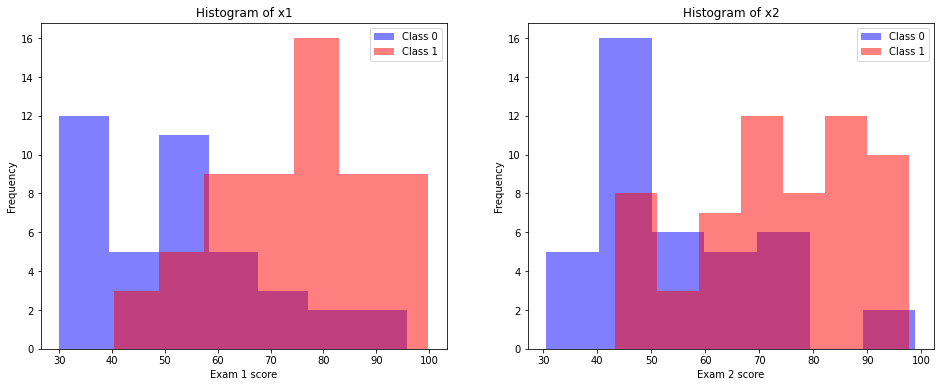

In [6]:
# TODO: Compute histograms

# Histogram and bins of feature 1 of class 0
x1_class_0 = X_train[y_train == 0]['x1']
x1_class_0_hist, x1_class_0_bins = np.histogram(x1_class_0, bins="auto")

# Histogram and bins of feature 1 of class 1
x1_class_1 = X_train[y_train == 1]['x1']
x1_class_1_hist, x1_class_1_bins = np.histogram(x1_class_1, bins="auto")

# Histogram and bins of feature 2 of class 0
x2_class_0 = X_train[y_train == 0]['x2']
x2_class_0_hist, x2_class_0_bins = np.histogram(x2_class_0, bins="auto")

# Histogram and bins of feature 2 of class 1
x2_class_1 = X_train[y_train == 1]['x2']
x2_class_1_hist, x2_class_1_bins = np.histogram(x2_class_1, bins="auto")

# TODO: plot histograms
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.hist(x1_class_0, bins=x1_class_0_bins, color='blue', alpha=0.5, label='Class 0')
plt.hist(x1_class_1, bins=x1_class_1_bins, color='red', alpha=0.5, label='Class 1')
plt.ylabel('Frequency')
plt.xlabel('Exam 1 score')
plt.title('Histogram of x1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(x2_class_0, bins=x2_class_0_bins, color='blue', alpha=0.5, label='Class 0')
plt.hist(x2_class_1, bins=x2_class_1_bins, color='red', alpha=0.5, label='Class 1')
plt.xlabel('Exam 2 score')
plt.ylabel('Frequency')
plt.title('Histogram of x2')
plt.legend()

plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [7]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs
    bin_index = np.digitize(x, bin_edges)

    if bin_index < 1 or bin_index >= len(hist_values):
        return 0.0  # x is outside the histogram range

    bin_count = hist_values[bin_index-1]
    total_count = np.sum(hist_values)

    return bin_count / total_count

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [8]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [9]:
# TODO: predict on test set in the 3 cases described above

y_pred_only_x1 = []
y_pred_only_x2 = []
y_pred_all = []

for index, sample in X_test.iterrows():
    # Using only feature x1 :
    posterior_class_0_only_x1 = P_c0 * likelihood_hist(sample[0], x1_class_0_hist, x1_class_0_bins)
    posterior_class_1_only_x1 = P_c1 * likelihood_hist(sample[0], x1_class_1_hist, x1_class_1_bins)

    if posterior_class_1_only_x1 > posterior_class_0_only_x1:
        y_pred_only_x1.append(1)
    else:
        y_pred_only_x1.append(0)

    # Using only feature x2 :
    posterior_class_0_only_x2 = P_c0 * likelihood_hist(sample[1], x2_class_0_hist, x2_class_0_bins)
    posterior_class_1_only_x2 = P_c1 * likelihood_hist(sample[1], x2_class_1_hist, x2_class_1_bins)
    if posterior_class_1_only_x2 > posterior_class_0_only_x2:
        y_pred_only_x2.append(1)
    else:
        y_pred_only_x2.append(0)

    # Using both x1 and x2 with the hypothesis of feature independence
    posterior_class_0_all = (P_c0 * likelihood_hist(sample[1], x2_class_0_hist, x2_class_0_bins)) * (P_c0 * likelihood_hist(sample[0], x1_class_0_hist, x1_class_0_bins))

    posterior_class_1_all = (P_c1 * likelihood_hist(sample[1], x2_class_1_hist, x2_class_1_bins)) * (P_c1 * likelihood_hist(sample[0], x1_class_1_hist, x1_class_1_bins))

    if posterior_class_1_all > posterior_class_0_all:
        y_pred_all.append(1)
    else:
        y_pred_all.append(0)

print("Accuracies using training data histograms : ")
print(f"\tAccuracy using only x1 : {accuracy_score(y_test, y_pred_only_x1)}")
print(f"\tAccuracy using only x2 : {accuracy_score(y_test, y_pred_only_x2)}")
print(f"\tAccuracy using x1, x2 : {accuracy_score(y_test, y_pred_all)}")

Accuracies using training data histograms : 
	Accuracy using only x1 : 0.66
	Accuracy using only x2 : 0.71
	Accuracy using x1, x2 : 0.83


Which system is the best ?
-> We can see that the system using both x1, x2 (exam 1 and exam 2) features performs better that using only x1 or x2.

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [10]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs

    # Compute exponent of a specific class using its mean and variance
    exponent = -((x - mean) ** 2) / (2 * var)
    # Compute full likelihood using exponent, mean and variance
    likelihood = (1 / (np.sqrt(2 * np.pi * var))) * np.exp(exponent)

    return likelihood

In [11]:
# TODO: Compute mean and variance for each class and each features (8 values)

# Mean & variance of feature 1 of class 0
x1_class_0_mean = np.mean(x1_class_0)
x1_class_0_variance = np.var(x1_class_0)

# Mean & variance of feature 1 of class 1
x1_class_1_mean = np.mean(x1_class_1)
x1_class_1_variance = np.var(x1_class_1)

# Mean & variance of feature 2 of class 0
x2_class_0_mean = np.mean(x2_class_0)
x2_class_0_variance = np.var(x2_class_0)

# Mean & variance of feature 2 of class 1
x2_class_1_mean = np.mean(x2_class_1)
x2_class_1_variance = np.var(x2_class_1)

In [12]:
# TODO: predict on test set in the 3 cases

y_pred_only_x1 = []
y_pred_only_x2 = []
y_pred_all = []

for index, sample in X_test.iterrows():
    # Using only feature x1 :
    posterior_class_0_only_x1 = P_c0 * likelihood_univariate_gaussian(sample[0], x1_class_0_mean, x1_class_0_variance)
    posterior_class_1_only_x1 = P_c1 * likelihood_univariate_gaussian(sample[0], x1_class_1_mean, x1_class_1_variance)

    if posterior_class_1_only_x1 > posterior_class_0_only_x1:
        y_pred_only_x1.append(1)
    else:
        y_pred_only_x1.append(0)

    # Using only feature x2 :
    posterior_class_0_only_x2 = P_c0 * likelihood_univariate_gaussian(sample[1], x2_class_0_mean, x2_class_0_variance)
    posterior_class_1_only_x2 = P_c1 * likelihood_univariate_gaussian(sample[1], x2_class_1_mean, x2_class_1_variance)
    if posterior_class_1_only_x2 > posterior_class_0_only_x2:
        y_pred_only_x2.append(1)
    else:
        y_pred_only_x2.append(0)

    # Using both x1 and x2 with the hypothesis of feature independence
    posterior_class_0_all = (P_c0 * likelihood_univariate_gaussian(sample[1], x2_class_0_mean, x2_class_0_variance)) * (P_c0 * likelihood_univariate_gaussian(sample[0], x1_class_0_mean, x1_class_0_variance))

    posterior_class_1_all = (P_c1 * likelihood_univariate_gaussian(sample[1], x2_class_1_mean, x2_class_1_variance)) * (P_c1 * likelihood_univariate_gaussian(sample[0], x1_class_1_mean, x1_class_1_variance))

    if posterior_class_1_all > posterior_class_0_all:
        y_pred_all.append(1)
    else:
        y_pred_all.append(0)

print("Accuracies using Univariate Gaussian Distribution : ")
print(f"\tAccuracy using only x1 : {accuracy_score(y_test, y_pred_only_x1)}")
print(f"\tAccuracy using only x2 : {accuracy_score(y_test, y_pred_only_x2)}")
print(f"\tAccuracy using x1, x2 : {accuracy_score(y_test, y_pred_all)}")


Accuracies using Univariate Gaussian Distribution : 
	Accuracy using only x1 : 0.71
	Accuracy using only x2 : 0.72
	Accuracy using x1, x2 : 0.92
